# Vowel Classification



**Author: Tejas Krishna Reddy** <br>
**Date:     7th September 2019** <br>
**Email: tejas.krishnareddy1415@gmail.com** <br>

### Introduction:


    Our aim in the problem is to classify different vowel sounds called by multiple speakers to their corresponding vowels. 

### Preprocessing of Data:

<br>
*source - Click Here[https://web.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.info.txt]*  

The International Phonetic Association (I.P.A.)
symbol and the word in which the eleven vowel sounds were recorded is given in
table 1.  The word was uttered once by each of the fifteen speakers.  Four
male and four female speakers were used to train the networks, and the other
four male and three female speakers were used for testing the performance.

<img src="Table1.png" width = "400" />
                              >          Table 1: Words used in Recording the Vowels 


The speech signals were low pass filtered at 4.7kHz and then digitised to 12
bits with a 10kHz sampling rate.  Twelfth order linear predictive analysis was
carried out on six 512 sample Hamming windowed segments from the steady part
of the vowel.  The reflection coefficients were used to calculate 10 log area
parameters, giving a 10 dimensional input space.  

Each speaker thus yielded six frames of speech from eleven vowels.  This gave
528 frames from the eight speakers used to train the networks and 462 frames
from the seven speakers used to test the networks.

### Data Analysis:
<br>
*Data is available at Click Here[https://web.stanford.edu/~hastie/ElemStatLearn/]*

- Training and Testing Data is downloaded seperetely.
- Training Data has 528 samples, each with 10 features and one predictor label.
- There are a total of 11 different classes the data belong to i.e 11 different sounds as shown in Table 1.
- Testing Data has 462 samples, each with 10 features and one predictor label. 
- There are a total of 11 different classes the data belong to i.e 11 different sounds as shown in Table 1.

### Approach: 
<br>
- Import training and testing data seperetly. 
- Train the data using various classification techniques.
- Test the above models on training data to check accuracy for each of the classification techniques.
- For testing measure, we can use *Accuracy = (Num of correctly classified data / Total number of samples)* and *Confusion Matrix*. Since, the data provided have equal number of samples for each class, we particularly need not check Precision, Recall or AUC scores. Also, the models developed by authors in the book also have measured their testing accuracy using the same formula as shown in Table 2 and Table 3. Therefore, a simple accuracy measure would be much easier to interpret and compare in the given scenario.
- *Confusion Matrix* on the other hand is one of the best tools to interpret the classifiers performance over given data. Its a very simple concept, if any of you are new to this, kindly go through the video[https://youtu.be/Kdsp6soqA7o]

### Previous Results and Methods:
<br>
<img src="Table2.png" width = "400" />
                              >          Table 2: Results from the book, page 107, 4.1 
                              
<img src="Table3.png" width = "400" />
                              >          Table 3: Results from the "info" section of the data
<br> <br>
    **Results in the above tables illustrate the authors work. The accuracies achieved using various classifiers are described. Now our aim is to use disparate classifiers other than the above mentioned one's and compare the results obtained to the above models.**  

# Let Us Start The Race :) 

In [3]:
import pandas as pd     # Pandas and numpy for easier executions
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

df = pd.read_csv('Test/vowel_train.csv') # Import training Data
df2 = pd.read_csv('Test/vowel_test.csv') # Import testing Data

### Below you can have a look at a sample of training and testing data to have a better idea of the data
print(df.head())
print(df2.tail())

     x.1    x.2    x.3    x.4    x.5    x.6    x.7    x.8    x.9   x.10  y
0 -3.639  0.418 -0.670  1.779 -0.168  1.627 -0.388  0.529 -0.874 -0.814  1
1 -3.327  0.496 -0.694  1.365 -0.265  1.933 -0.363  0.510 -0.621 -0.488  2
2 -2.120  0.894 -1.576  0.147 -0.707  1.559 -0.579  0.676 -0.809 -0.049  3
3 -2.287  1.809 -1.498  1.012 -1.053  1.060 -0.567  0.235 -0.091 -0.795  4
4 -2.598  1.938 -0.846  1.062 -1.633  0.764  0.394 -0.150  0.277 -0.396  5
       x.1    x.2    x.3    x.4    x.5    x.6    x.7    x.8    x.9   x.10   y
457 -3.239  3.083 -1.427 -0.202 -0.282  1.421  0.576  0.068 -0.914  0.147   7
458 -3.753  3.605 -0.899 -0.747 -0.401  1.765  0.620  0.754 -0.835 -0.301   8
459 -3.980  2.459  0.068  0.023  0.237  1.029 -0.189  0.521 -0.773 -0.500   9
460 -4.264  2.925  0.065  0.794  0.323  0.515 -1.282 -0.140 -0.863 -0.390  10
461 -3.291  2.324 -0.679  0.285  0.441  0.557 -0.227  0.115 -1.046  0.697  11


In [4]:
target_variable = 'y'

X_train = np.array(df.drop([target_variable], 1))
y_train = np.array(df[target_variable])
X_test = np.array(df2.drop([target_variable], 1))
y_test = np.array(df2[target_variable])

### Below you could see the shape of training and testing data. 10 Samples and 1 predictor
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(528, 10) (528,)
(462, 10) (462,)


In [5]:
#### PreProcessing the features
### Peform Standard Scaling on the features of both training and testing data
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
print("The features in training and testing data have been centered and scaled using Standard Scaling Tecchnique")

The features in training and testing data have been centered and scaled using Standard Scaling Tecchnique


In [29]:
### Define a function to print the accuracy and confusion matrix for each of the models developed 
def testing(modl):
    array = (metrics.confusion_matrix(y_test, modl.predict(X_test)))    ## confusion matrix
    
    df_cm = pd.DataFrame(array, range(11),
                  range(11))
    
    sns.set(font_scale=1.1)#for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 12})## font size inside the matrix,annot shows us the values inside matrix

    pred_values = modl.predict(X_test)                                    ##### Accuracy value calculation
    comp = pd.DataFrame(np.column_stack((y_test, pred_values)))
    comp1 = comp[comp.iloc[:,0] == comp.iloc[:,1]]
    print('out of ', str(len(comp)), 'variables, ', str(len(comp1)), 'variables were detected properly')
    print('\nAccuracy = ', len(comp1)/len(comp))    ## accuracy formula
    

In [15]:
########## Import Different Classifiers ############

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA


**Firstly, lets start of with Linear Classifiers:**
- Stochastic gradient Decent Classifier (SGD Classifier) is a regularized linear model to solve a convex loss funciton. From the fact that there are 11 different classes, a SGD classifier would not work so well.
- Linear Support Vector Machines (SVM Classifier) is the best linear classifier that can be defined in the current problem in my opinion. 
- Having only 500 training samples and 10 features per sample, it is not advisable to test ridge or lasso classifiers on the current data and hence are omited

C:\Users\Tejas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


out of  462 variables,  159 variables were detected properly

Accuracy =  0.34415584415584416


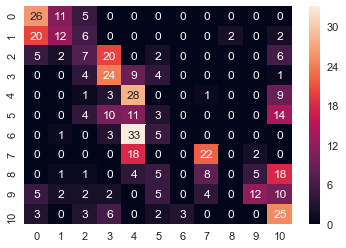

In [35]:
### Stochastic Gradient Decent Classifier
modl1 = SGDClassifier().fit(X_train, y_train)
testing(modl1)
### out of  462 variables,  166 variables were detected properly - 35% accuracy

out of  462 variables,  190 variables were detected properly

Accuracy =  0.41125541125541126


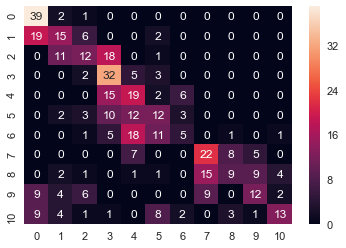

In [36]:
############## Linear Support Vector Machines ###########
# This could be termed as one of the best linear classifier ML models.
modl2 = LinearSVC().fit(X_train, y_train)
testing(modl2)
### out of  462 variables,  190 variables were detected properly - 41.1% accuracy

**Let us try simple non-linear classifiers on the data**
- Let us try one discriminant analysis technique, either fisherLDA or QuadraticDiscriminantAnalysis on the given data to analyze the results. Personally, they aren't recommended for a 10D data with 11 classes. More dimensional data with less classes would be suitable for such an analysis.
- Let us try Gaussian naive_bayes technique to classify the data. I am trying this since authors tried gaussian neural net. This could be used to compare their results to mine.
- Let us try the best non linear model - SVM, 'radial basis function' classifier. This should do the best in my opinion for the given data.

out of  462 variables,  192 variables were detected properly

Accuracy =  0.4155844155844156


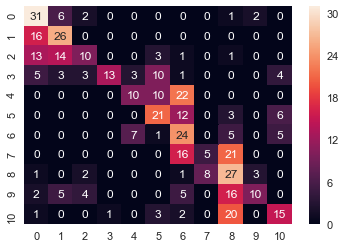

In [37]:
#### Quadratic Discriminant Analysis
modl3 = QDA().fit(X_train, y_train)
testing(modl3)
### out of  462 variables,  192 variables were detected properly - 41.5%

out of  462 variables,  238 variables were detected properly

Accuracy =  0.5151515151515151


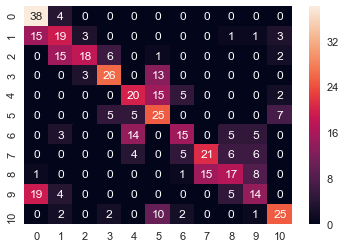

In [38]:
### Gaussian Naive Bayes classifier
modl4 = GaussianNB(priors = None).fit(X_train, y_train)
testing(modl4)
### out of  462 variables,  238 variables were detected properly - 51.5% accuracy

out of  462 variables,  268 variables were detected properly

Accuracy =  0.5800865800865801


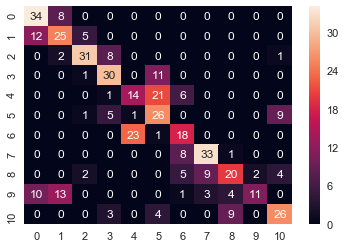

In [39]:
#### Support Vector Machines with 'Radial Basis Function' Kernel.
modl5 = SVC(kernel = 'rbf', degree = 3, probability= False).fit(X_train, y_train)
testing(modl5)
### out of  462 variables,  268 variables were detected properly - 58% accuracy

**Bagging Techniques and Nearest Neighbors Technique**
- Random Forest is the most famous and widely used bagging Technique. So let's give this a try.
- K nearest neighbors is another famous Technique which checks the nearest K neighbours to decide which class a datapoint belongs to. This classifier is employed by the authors too. But i wanted to give another try with different number of K's to check the optimal number for the best accuracy.

out of  462 variables,  273 variables were detected properly

Accuracy =  0.5909090909090909


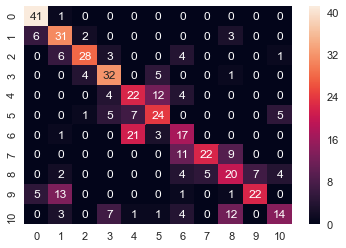

In [41]:
######## Random Forest Classifier
modl6 = RandomForestClassifier(n_estimators=45, criterion='gini',min_samples_split=2, oob_score = True).fit(X_train, y_train)
testing(modl6)
### out of 462 variables, 265 variables classified correctly - 58% accuracy

out of  462 variables,  243 variables were detected properly

Accuracy =  0.525974025974026


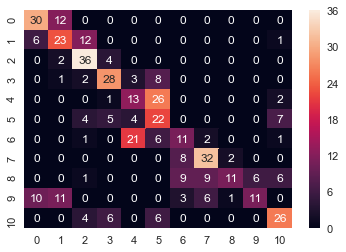

In [45]:
###### KNN Algorithm ####
modl7 = KNeighborsClassifier(n_neighbors=8, weights = 'distance', n_jobs=-1, p=1).fit(X_train, y_train)
testing(modl7)
### out of  462 variables,  271 variables were detected properly - 58.65% accuracy

**How About Decision Trees?**
- Data with considerably less features are always best classified by decision trees. Our data is quite suitable for this type of classification techniques. 
- Let us use 2 common types of classifiers in this category, i.e Extra trees classifier and decison tree classifier to check how trees perform on the given problem.

out of  462 variables,  216 variables were detected properly

Accuracy =  0.4675324675324675


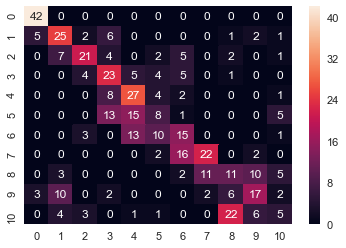

In [50]:
#### Decision Tree Classifier ####
modl8 = DecisionTreeClassifier(max_depth=9, min_samples_split = 10, class_weight = 'balanced').fit(X_train, y_train)
testing(modl8)
### out of  462 variables,  209 variables were detected properly - 46% accuracy

out of  462 variables,  295 variables were detected properly

Accuracy =  0.6385281385281385


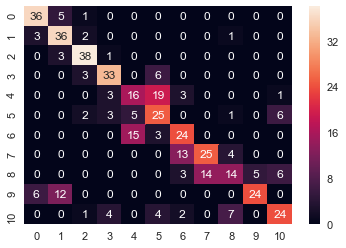

In [51]:
####### Extra Trees Classifier #######
modl9 = ExtraTreesClassifier(n_estimators = 130).fit(X_train, y_train)
testing(modl9)
### out of  462 variables,  293 variables were detected properly - 63.8% accuracy

**Finally, Lets Try Boosting Techniques**
- Boosting is the process where many small/weak classifiers are developed which inturn combine to form a powerful classifier.
- GradientBoostingClassifier is a common and powerful boosting technique used to develop many weak learners to converge the error to the best possible level. Let's give it a try.
- Adaboosting technique is a place where one can choose the kind of weak learner he wants and then develop many weak lerners to form a powerful classifier in the end. Here, we choose a decision tree classifier with less estimators to be a weak learner.

out of  462 variables,  265 variables were detected properly

Accuracy =  0.5735930735930735


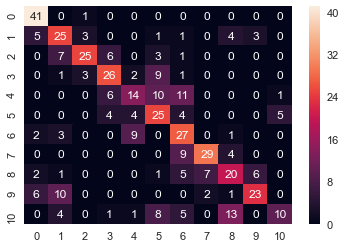

In [54]:
######## Gradient Boosting Regressor ######
modl10 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.08, min_samples_split=20).fit(X_train, y_train)
testing(modl10)
### out of  462 variables,  264 variables were detected properly - 57.5% accuracy

out of  462 variables,  298 variables were detected properly

Accuracy =  0.645021645021645


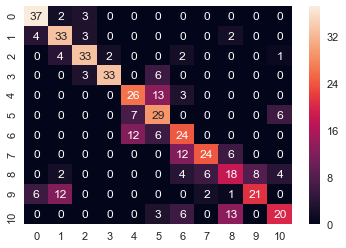

In [57]:
##### Adaboosting Classifier with DecisionTree classifier as a weak learner ##################
modl11 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=10, min_samples_split = 2, class_weight = 'balanced')
                            ,n_estimators = 100).fit(X_train, y_train)
testing(modl11)
### Adaboosting with Decision Tree Classifier 
### out of  462 variables,  288 variables were detected properly - Accuracy 64% 

**Feature Engineering - All the above examples we used the given data as it is. Feature reduction/ dimensionality reduction is not necessery since its a small data with considerably less number of features. But let us give them a shot :)** 
- PCA reduces the currently 10 dimensional data to 'n' dimensional data where n<10. 
- 'RFECV' is a recurrent feature reduction technique where each of the less important feature is removed step by step untill the bad/misleading features are removed.
- PCA gives pretty bad results since, the dimensions are already small and thereby reducing dimensions we are underfitting the model.
- We can see in RFECV method, we could remove features x8, x9 and x10 and still achieve 41% accuracy using Linear SVC model. This helps us know which features to have and which could be deleted.

In [58]:
### PCA and then any classifier
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
classifier = LinearSVC()
X_transformed = pca.fit_transform(X_train)
classifier.fit(X_transformed, y_train)
X_test_transformed = pca.fit_transform(X_test)
pred_values = classifier.predict(X_test_transformed)
comp = pd.DataFrame(np.column_stack((y_test, pred_values)))
comp1 = comp[comp.iloc[:,0] == comp.iloc[:,1]]
print('out of ', str(len(comp)), 'variables, ', str(len(comp1)), 'variables were detected properly')
print('\nAccuracy = ', len(comp1)/len(comp))    ## accuracy formula

out of  462 variables,  112 variables were detected properly

Accuracy =  0.24242424242424243


out of  462 variables,  192 variables were detected properly

Accuracy =  0.4155844155844156
[ True  True  True  True  True  True  True False False False]


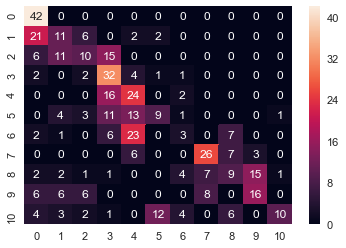

In [60]:
### RFECV and any classifier
"""
We can see in RFECV method, we could remove features x8, x9 and x10 and still achieve 41.5% accuracy using Linear SVC model. 
This helps us know which features to have and which could be deleted.
"""
from sklearn.feature_selection import RFECV
classifier1 = LinearSVC()  ### Using Linear SVC classifier
modl12 = RFECV(classifier1, step = 1, verbose = 0, n_jobs=-1).fit(X_train, y_train)
testing(modl11)
print(modl12.support_)

## Lets Dive Deep into Deep Learning Techniques :)  

**The authors have used many neural network structures as shown in table 2. Now let us breifly test the data on 4 unique models:**
1. Single Layer Perceptrons - the same as what author has done.
2. Densely connected Layers.
3. Convolutional Neural Network (CNN) Layers.
4. CUDA LSTMS - These models have recently become my favorite due to their exceptional speed boost in executing large datasets.Though we might not be able to see significant time difference in execution due to small data, I would like to give it a shot.

**NOTE: - I have deliberatly overfited the models, since we arent testing on real time data and our current aim is to achieve best possible accuracy for provided test data. If not, the number of epochs would have been limited to the the point where the 2 curves in graph started diverging in exponentially different angles.**

out of  462 variables,  257 variables were detected properly

Accuracy =  0.5562770562770563


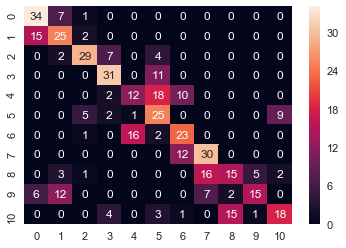

In [62]:
### Single layer perceptrons
modl13 = MLPClassifier(alpha = 1, max_iter = 1200).fit(X_train, y_train)
testing(modl13)
### out of  462 variables,  253 variables were detected properly - 55.6%

In [6]:
from keras import layers, models        #### Using Keras Backend (tf backend)
from keras.utils import to_categorical  #### converts to categorical values to be suitable for neural net output layer

y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

n_classes = 11 # there are 11 different types of classes in training data

In [7]:
#### A function to plot the training Vs Testing accuracy. This helps us choose the right number of eopchs and checks us 
#### not to overfit the model. 

def plot(model):
    # Plot training & validation accuracy values
    plt.plot(model.history.history['acc'])
    plt.plot(model.history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()



In [8]:
### Fully Connected Dense Layer - 45% accuracy

network = models.Sequential()
network.add(layers.Dense(400, activation = 'relu', input_shape = (10, )))   ## x1 to x10 in data
network.add(layers.Dropout(0.4))
network.add(layers.Dense(100, activation = 'relu'))
network.add(layers.Dropout(0.4))
network.add(layers.Dense(n_classes+1, activation = 'softmax'))

network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

network.fit(X_train, y_train1, epochs = 10, batch_size = 64)

network.evaluate(X_test, y_test1)



Epoch 1/10
528/528 [==============================] - 3s 6ms/step - loss: 2.2818 - acc: 0.2348
Epoch 2/10
528/528 [==============================] - 0s 157us/step - loss: 1.9229 - acc: 0.3731
Epoch 3/10
528/528 [==============================] - 0s 163us/step - loss: 1.7156 - acc: 0.4489
Epoch 4/10
528/528 [==============================] - 0s 143us/step - loss: 1.5614 - acc: 0.4432
Epoch 5/10
528/528 [==============================] - 0s 117us/step - loss: 1.4581 - acc: 0.5057
Epoch 6/10
528/528 [==============================] - 0s 108us/step - loss: 1.2884 - acc: 0.5795
Epoch 7/10
528/528 [==============================] - 0s 101us/step - loss: 1.2348 - acc: 0.5568
Epoch 8/10
528/528 [==============================] - 0s 98us/step - loss: 1.1255 - acc: 0.6269
Epoch 9/10
528/528 [==============================] - 0s 257us/step - loss: 1.0898 - acc: 0.6364
Epoch 10/10
462/462 [==============================] - 0s 245us/step


[1.3207379496974863, 0.45238095263898115]

**Now Let Us Try CNN** 

In [39]:
##### Convolutionl neural networks - 1D convolutional Networks used - 59.7% accuracy

X_train1 = X_train.reshape(528, 10, 1)
X_test1 = X_test.reshape(462, 10, 1)   # Just make it 3D by adding 1 height layer 

network2 = models.Sequential()
network2.add(layers.Conv1D(64, (3), activation = 'relu', input_shape = (10, 1)))
network2.add(layers.Dropout(0.2))
network2.add(layers.MaxPooling1D(pool_size=(1)))
network2.add(layers.Flatten())
network2.add(layers.Dense(32, activation = 'relu'))
network2.add(layers.Dense(n_classes+1, activation= 'softmax'))

network2.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

network2.fit(X_train1, y_train1,
          batch_size=200,
          epochs=70,
          verbose=1,
          validation_data=(X_test1, y_test1))


Train on 528 samples, validate on 462 samples
Epoch 1/70
528/528 [==============================] - 2s 4ms/step - loss: 2.4916 - acc: 0.0606 - val_loss: 2.4517 - val_acc: 0.1234
Epoch 2/70
528/528 [==============================] - 0s 85us/step - loss: 2.4183 - acc: 0.1629 - val_loss: 2.4008 - val_acc: 0.1472
Epoch 3/70
528/528 [==============================] - 0s 108us/step - loss: 2.3489 - acc: 0.2311 - val_loss: 2.3433 - val_acc: 0.1645
Epoch 4/70
528/528 [==============================] - 0s 94us/step - loss: 2.2559 - acc: 0.2670 - val_loss: 2.2740 - val_acc: 0.2100
Epoch 5/70
528/528 [==============================] - 0s 103us/step - loss: 2.1682 - acc: 0.3314 - val_loss: 2.1954 - val_acc: 0.2229
Epoch 6/70
528/528 [==============================] - 0s 110us/step - loss: 2.0384 - acc: 0.3788 - val_loss: 2.1059 - val_acc: 0.2403
Epoch 7/70
528/528 [==============================] - 0s 94us/step - loss: 1.9122 - acc: 0.4508 - val_loss: 2.0182 - val_acc: 0.2749
Epoch 8/70
528/528 [=

Epoch 62/70
528/528 [==============================] - 0s 94us/step - loss: 0.2145 - acc: 0.9545 - val_loss: 1.5703 - val_acc: 0.5628
Epoch 63/70
528/528 [==============================] - 0s 98us/step - loss: 0.2119 - acc: 0.9375 - val_loss: 1.5845 - val_acc: 0.5909
Epoch 64/70
528/528 [==============================] - 0s 107us/step - loss: 0.1984 - acc: 0.9602 - val_loss: 1.5880 - val_acc: 0.5866
Epoch 65/70
528/528 [==============================] - 0s 110us/step - loss: 0.2040 - acc: 0.9413 - val_loss: 1.6764 - val_acc: 0.5758
Epoch 66/70
528/528 [==============================] - 0s 103us/step - loss: 0.1968 - acc: 0.9583 - val_loss: 1.6467 - val_acc: 0.5736
Epoch 67/70
528/528 [==============================] - 0s 115us/step - loss: 0.1870 - acc: 0.9564 - val_loss: 1.5764 - val_acc: 0.5996
Epoch 68/70
528/528 [==============================] - 0s 117us/step - loss: 0.1985 - acc: 0.9470 - val_loss: 1.6020 - val_acc: 0.5974
Epoch 69/70
528/528 [==============================] - 0s

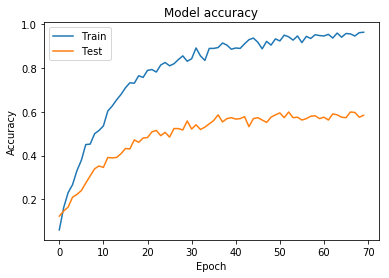

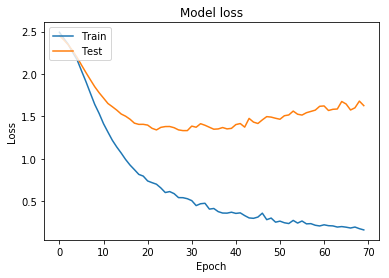

In [40]:
plot(network2)

**Now let us try *Long Short Term Memory* Units, (LSTM's) which are a type of recurrent neural networks which work on a feed back system from one output to the next generated input.** 
- CUDNNLSTM's are LSTMs that use GPU memories for faster executions. The speed could be 10-100 times faster compared to normal LSTM's depending on the size of the data. However, we might not be able to recognize significant difference now, due to the nature of given small data.

In [52]:
#### CudaLSTMs - 63% accuracy

from tensorflow.keras.layers import CuDNNLSTM 
import tensorflow as tf
#from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM

model = models.Sequential()

### cudacnn uses tanh activation function automatically
model.add(layers.CuDNNLSTM(128, input_shape=(X_train1.shape[1:]), return_sequences=True))
model.add(layers.Dropout(0.2))

#model.add(LSTM(128, activation='relu'))
model.add(layers.CuDNNLSTM(64))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(n_classes+1, activation='softmax'))

### Declare an Optimizer - Adam Optimizer works well
opt = 'Adam'

# Compile model
## If 'sparse categorical crossentropy' is used as loss, then y_test and y_train need not be categorical, so use ytest n ytrain.
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

model.fit(X_train1,
          y_train1,
          batch_size=128,
          epochs=75,
          validation_data=(X_test1, y_test1))  


Train on 528 samples, validate on 462 samples
Epoch 1/75
528/528 [==============================] - 5s 9ms/step - loss: 2.4835 - acc: 0.0852 - val_loss: 2.4776 - val_acc: 0.1299
Epoch 2/75
528/528 [==============================] - 0s 233us/step - loss: 2.4738 - acc: 0.1420 - val_loss: 2.4673 - val_acc: 0.1883
Epoch 3/75
528/528 [==============================] - 0s 200us/step - loss: 2.4622 - acc: 0.1610 - val_loss: 2.4519 - val_acc: 0.1688
Epoch 4/75
528/528 [==============================] - 0s 232us/step - loss: 2.4403 - acc: 0.1837 - val_loss: 2.4244 - val_acc: 0.1753
Epoch 5/75
528/528 [==============================] - 0s 242us/step - loss: 2.4125 - acc: 0.1629 - val_loss: 2.3789 - val_acc: 0.1861
Epoch 6/75
528/528 [==============================] - 0s 234us/step - loss: 2.3635 - acc: 0.1667 - val_loss: 2.2974 - val_acc: 0.1905
Epoch 7/75
528/528 [==============================] - 0s 249us/step - loss: 2.2698 - acc: 0.1667 - val_loss: 2.1929 - val_acc: 0.2013
Epoch 8/75
528/528

528/528 [==============================] - 0s 289us/step - loss: 0.6005 - acc: 0.7784 - val_loss: 1.2866 - val_acc: 0.6299
Epoch 62/75
528/528 [==============================] - 0s 302us/step - loss: 0.5245 - acc: 0.8068 - val_loss: 1.3473 - val_acc: 0.5996
Epoch 63/75
528/528 [==============================] - 0s 260us/step - loss: 0.5097 - acc: 0.8068 - val_loss: 1.3087 - val_acc: 0.6039
Epoch 64/75
528/528 [==============================] - 0s 273us/step - loss: 0.4915 - acc: 0.8447 - val_loss: 1.3373 - val_acc: 0.5931
Epoch 65/75
528/528 [==============================] - 0s 268us/step - loss: 0.5068 - acc: 0.8201 - val_loss: 1.2674 - val_acc: 0.6147
Epoch 66/75
528/528 [==============================] - 0s 272us/step - loss: 0.5210 - acc: 0.8144 - val_loss: 1.3074 - val_acc: 0.5887
Epoch 67/75
528/528 [==============================] - 0s 230us/step - loss: 0.4727 - acc: 0.8333 - val_loss: 1.3398 - val_acc: 0.5758
Epoch 68/75
528/528 [==============================] - 0s 234us/ste

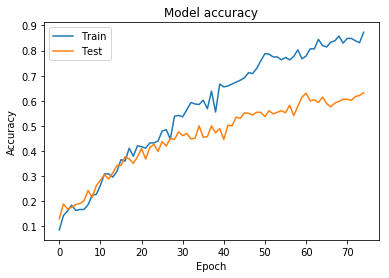

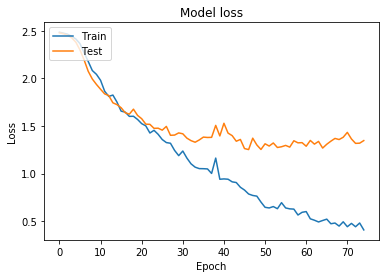

In [53]:
plot(model)

# Conclusion:
<br> <br>
Let us look at all the models used and their final accuracies obtained:

**Personally,** <br><br>
**1. I anticipated Gradient Boosting Classifier and Adaboosting Classifier to do well when companred to other Non-Linear Classifiers.** <br><br>
**2. Extra Trees Classifier was unexpected to do so well with such less data. That was a surprise.** <br><br> 
**3. I thought we could achieve atleast 70-75% accuracy with LSTM's but unfortunately they did well compared to other models as anticipated but such an accuracy could not be obtained. I assume with more data, that was easily possible.** <br>
<br>

   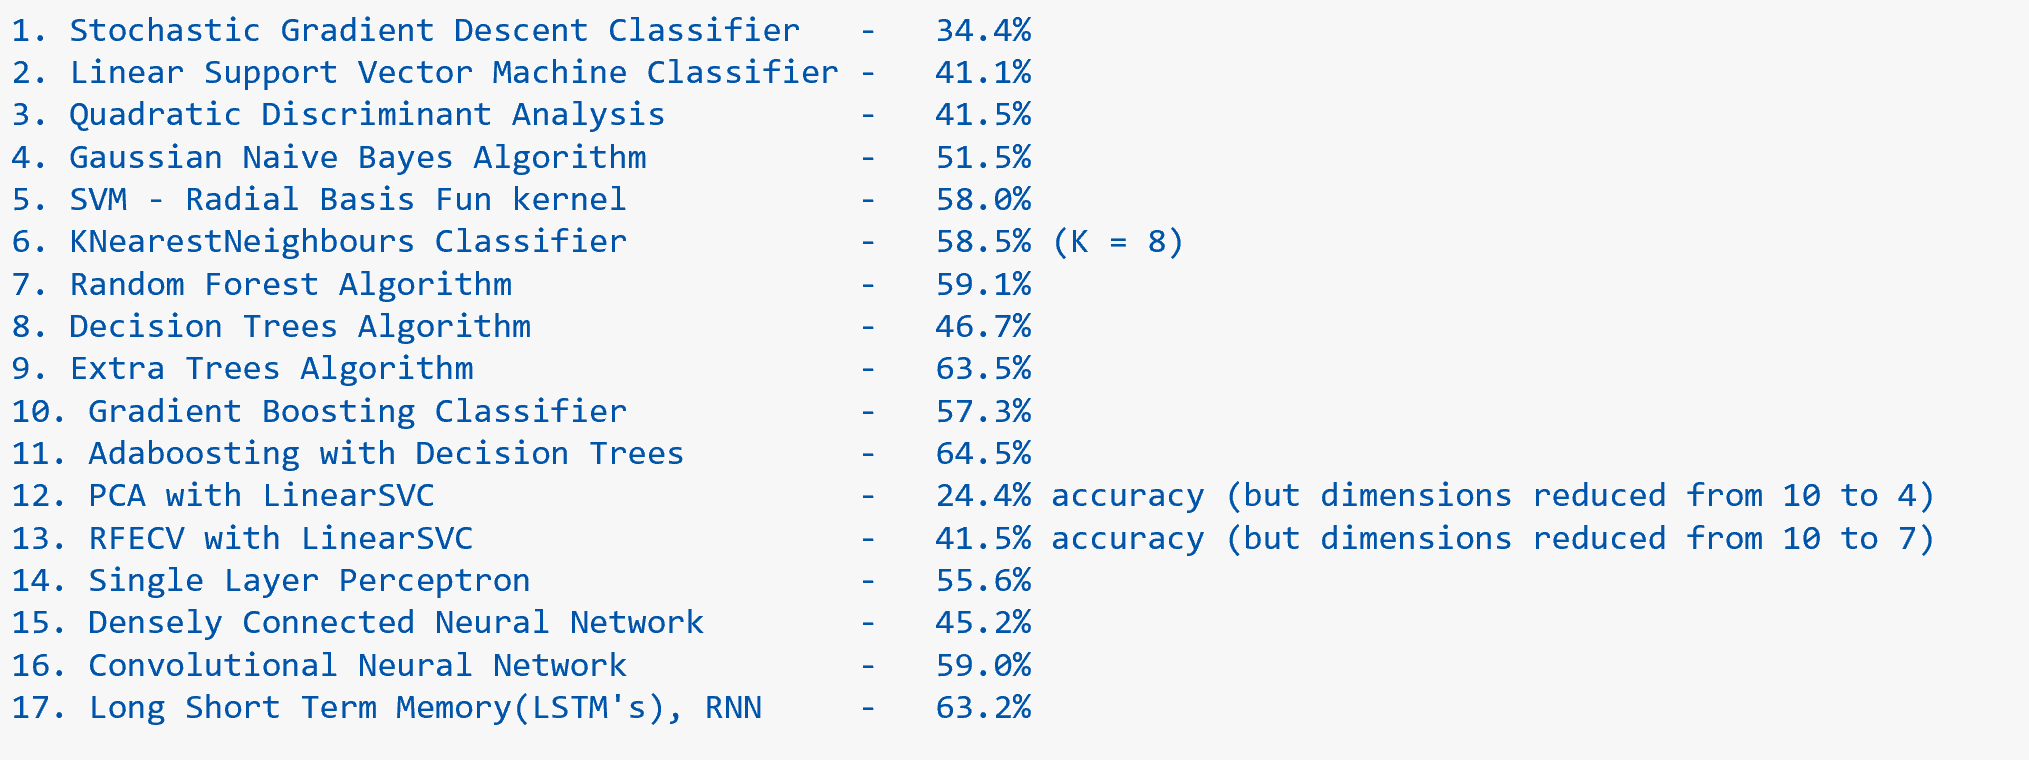
          

I have reattached Table 2 below, for easier comparision of authors work and results obtained above.

<img src="Table3.png" width = "400" />
                              >          Table 3: Results from the "info" section of the data

# THANK YOU!!!